In [4]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
n = 200
alpha = 0.05

In [6]:
def mean(sample): # выборочное среднее
    return sum(sample) / len(sample)

def var(sample): # исправленная выборочная дисперсия
    mu = mean(sample)
    return sum([(x - mu) ** 2 for x in sample]) / (len(sample) - 1)

def st_deviation(sample): # выборочное стандартное отклонениe
    mu = mean(sample)
    return (sum([(x - mu) ** 2 for x in sample]) / (len(sample) - 1)) ** 0.5

### Распределение Пуассона

In [7]:
poission_theta = 9
poisson_sample = sps.poisson(poission_theta).rvs(n)

u_half_alpha = - sps.norm.ppf(alpha / 2)
poisson_lower_boundary = mean(poisson_sample) - u_half_alpha / n**0.5
poisson_upper_boundary = mean(poisson_sample) + u_half_alpha / n**0.5

print(f"θ = {poission_theta}")
print(f"Доверительный интервал для θ: [{poisson_lower_boundary}, {poisson_upper_boundary}]")

θ = 9
Доверительный интервал для θ: [9.046409617565033, 9.323590382434968]



### Экспоненциальное распределение

In [8]:
exp_lambda = 3
exponential_sample = np.random.exponential(1 / exp_lambda, n)

u_half_alpha = - sps.norm.ppf(alpha / 2)
exp_lower_boundary = (1 - u_half_alpha / n**0.5) / np.mean(exponential_sample)
exp_upper_boundary = (1 + u_half_alpha / n**0.5) / np.mean(exponential_sample)

print(f'λ = {exp_lambda}')
print(f'Доверительный интервал для λ: [{exp_lower_boundary}, {exp_upper_boundary}]')

λ = 3
Доверительный интервал для λ: [2.3819818158830257, 3.148445909352345]


### Биномиальное распределение

In [9]:
binomial_p = 0.2
binomial_sample = sps.bernoulli(binomial_p).rvs(n)
m = np.sum(binomial_sample)

u_half_alpha = - sps.norm.ppf(alpha / 2)
binomial_lower_boundary = m / n - u_half_alpha * (m * (n - m) / n) ** 0.5 / n
binomial_upper_boundary = m / n + u_half_alpha * (m * (n - m) / n) ** 0.5 / n

print(f'p = {binomial_p}')
print(f'Доверительный интервал для p: [{binomial_lower_boundary}, {binomial_upper_boundary}]')

p = 0.2
Доверительный интервал для p: [0.10484349149709415, 0.20515650850290584]


# Ядерные оценки

### Нормальное распределение

In [10]:
def gauss_kernel(x, h, sample): # гауссовское ядро
    return 1 / (n * h) * sum([sps.norm.pdf((x - x_j) / h) for x_j in sample])

def uniform_kernel(x, h, sample): # равномерное ядро
    return 1 / (n * h) * sum([sps.uniform(-1, 2).pdf((x - x_i) / h) for x_i in sample])

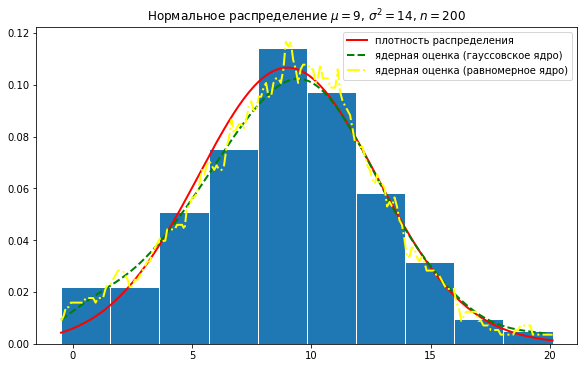

In [11]:
gauss_exp = 9
gauss_var = 14
gauss_distribution = sps.norm(gauss_exp, gauss_var**0.5)
gauss_sample = gauss_distribution.rvs(n)

h = 1.06 * st_deviation(gauss_sample) / n ** 0.2  # ширина окна

plt.figure(figsize=(8,5), constrained_layout=True)
plt.title(f'Нормальное распределение $\mu = {gauss_exp}$, $\sigma^2 = {gauss_var}$, $n = {n}$')
plt.hist(gauss_sample, density=True, stacked=True, edgecolor = 'white')
grid = np.linspace(min(gauss_sample), max(gauss_sample), n)
plt.plot(grid, gauss_distribution.pdf(grid), lw=2, color='red')

plt.plot(grid, gauss_kernel(grid, h, gauss_sample), lw=2, color='green', ls = '--')
plt.plot(grid, uniform_kernel(grid, h, gauss_sample), lw=2, color='yellow', ls = '-.')

plt.legend(['плотность распределения', 'ядерная оценка (гауссовское ядро)', 'ядерная оценка (равномерное ядро)'])
plt.show()

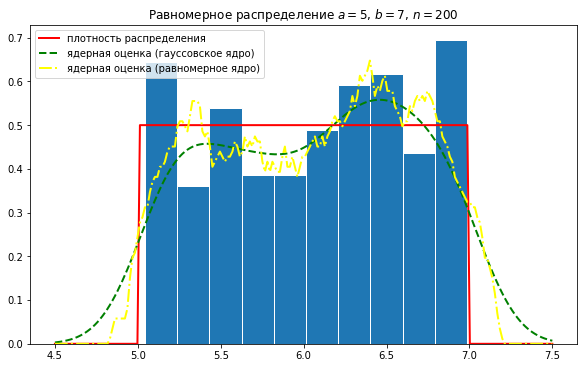

In [12]:
a = 5
b = 7
uniform_distribution = sps.uniform(a, b - a)
uniform_sample = uniform_distribution.rvs(n)

h = 1.06 * st_deviation(uniform_sample) / n ** 0.2  # ширина окна

plt.figure(figsize=(8,5), constrained_layout=True)
plt.title(f'Равномерное распределение $a = {a}$, $b = {b}$, $n = {n}$')
plt.hist(uniform_sample, density=True, stacked=True, edgecolor='white')
grid = np.linspace(a - 0.5, b + 0.5, n)
plt.plot(grid, uniform_distribution.pdf(grid), lw=2, color='red')

plt.plot(grid, gauss_kernel(grid, h, uniform_sample), lw=2, color='green', ls = '--')
plt.plot(grid, uniform_kernel(grid, h, uniform_sample), lw=2, color='yellow', ls = '-.')

plt.legend(['плотность распределения', 'ядерная оценка (гауссовское ядро)', 'ядерная оценка (равномерное ядро)'])

plt.show()

# Линейная регрессия

In [13]:
def cor_coef(first_sample, second_sample):
    cov = mean(first_sample * second_sample) - mean(first_sample) * mean(second_sample)
    return cov / (var(first_sample) * var(second_sample)) ** 0.5

def regression(x, first_sample, second_sample):
    return cor_coef(first_sample, second_sample) * (x - mean(first_sample)) * st_deviation(second_sample) / st_deviation(first_sample) + mean(second_sample)

In [14]:
def group_data(sample, k):
    sample_sorted = sorted(sample)
    x0 = math.floor(min(sample_sorted))
    xn = math.ceil(max(sample_sorted))
    bounds = [x0 + i * (xn - x0) / k for i in range(k + 1)]
    intervals = [(bounds[i], bounds[i + 1]) for i in range(np.size(bounds) - 1)]
    grouped_sample_row = [(a + b) / 2 for (a, b) in intervals]
    sample_gr = np.zeros(np.size(sample_sorted))
    for i in range(np.size(sample_sorted)):
        entry_interval = [j for j in range(k) if intervals[j][0] <= sample_sorted[i] <= intervals[j][1]][0]
        sample_gr[i] = grouped_sample_row[entry_interval]
    return sample_gr

In [15]:
def conf_interval_for_cov(first_sample, second_sample):
    u_half_alpha = - sps.norm.ppf(alpha / 2)
    var_coef_n = cor_coef(first_sample, second_sample)

    m = 0.5 * np.log((1 + var_coef_n) / (1 - var_coef_n))
    z_lower = - u_half_alpha / (n - 3) ** 0.5 + m
    z_upper = u_half_alpha / (n - 3) ** 0.5 + m
    lower_boundary = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
    upper_boundary = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)
    return lower_boundary, upper_boundary

def print_cov_intervals(eta, ksi):
    lower, upper = conf_interval_for_cov(eta, ksi)
    print("Оценка коэффициента корелляции (без группирования):")
    print(f"Доверительный интервал: [{lower}, {upper}]")
    print(f"Точечная оценка: {cor_coef(eta, ksi)}")
    print()

    k = 7
    eta_gr = group_data(eta, k)
    ksi_gr = group_data(ksi, k)
    lower, upper = conf_interval_for_cov(eta_gr, ksi_gr)
    print("Оценка коэффициента корелляции (с группированием):")
    print(f"Доверительный интервал: [{lower}, {upper}]")
    print(f"Точечная оценка: {cor_coef(eta_gr, ksi_gr)}")

### Гауссовский шум

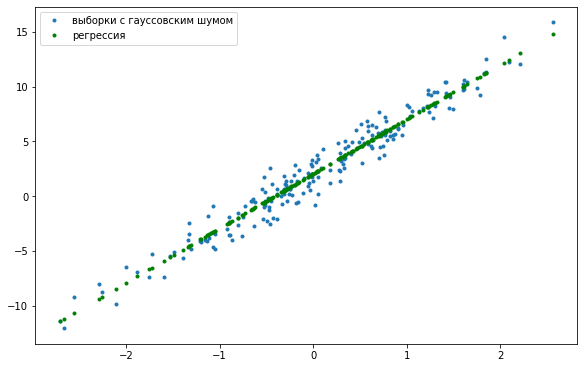

Оценка коэффициента корелляции (без группирования):
Доверительный интервал: [0.9646474012351273, 0.9796231590136051]
Точечная оценка: 0.9731462583377045

Оценка коэффициента корелляции (с группированием):
Доверительный интервал: [0.9374331061570423, 0.963724283978346]
Точечная оценка: 0.9523155589925772


In [16]:
eta = sps.norm(0, 1).rvs(n)
ksi = 2 + 5 * eta

gauss_noise = sps.norm(0, 1).rvs(n)
# ksi += 0.01 * gauss_noise
ksi += gauss_noise

plt.figure(figsize=(8,5), constrained_layout=True)
plt.plot(eta, ksi, '.')
plt.plot(eta, regression(eta, eta, ksi), '.', color='green')
plt.legend(['выборки с гауссовским шумом', 'регрессия'])
plt.show()

# plt.figure(figsize=(8,5), constrained_layout=True)
# plt.plot(eta, ksi - regression(eta, eta, ksi), '.')
# plt.axhline(0)
# plt.legend(['остатки'])
# plt.show()

print_cov_intervals(eta, ksi)

### Равномерный шум

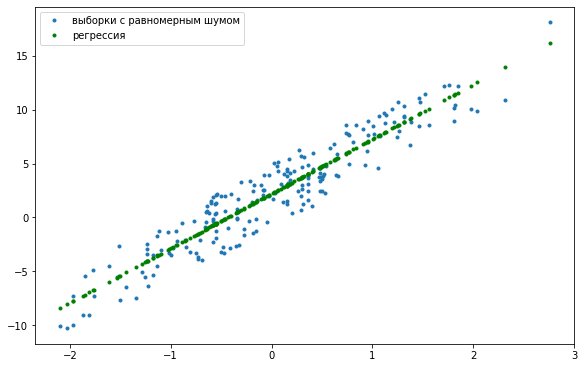

Оценка коэффициента корелляции (без группирования):
Доверительный интервал: [0.9214208100063975, 0.9542817252768595]
Точечная оценка: 0.9399940577661997

Оценка коэффициента корелляции (с группированием):
Доверительный интервал: [0.881541206567619, 0.9304758715811012]
Точечная оценка: 0.9090945720099818


In [17]:
eta = sps.norm(0, 1).rvs(n)
ksi = 2 + 5 * eta

a, b = -3, 3
uniform_noise = sps.uniform(a, b - a).rvs(n)
# ksi += 0.01 * uniform_noise
ksi += uniform_noise

plt.figure(figsize=(8,5), constrained_layout=True)
plt.plot(eta, ksi, '.')
plt.plot(eta, regression(eta, eta, ksi), '.', color='green')
plt.legend(['выборки с равномерным шумом', 'регрессия'])
plt.show()

# plt.figure(figsize=(8,5), constrained_layout=True)
# plt.plot(eta, ksi - regression(eta, eta, ksi), '.')
# plt.axhline(0)
# plt.legend(['остатки'])
# plt.show()

print_cov_intervals(eta, ksi)

### Шум Коши

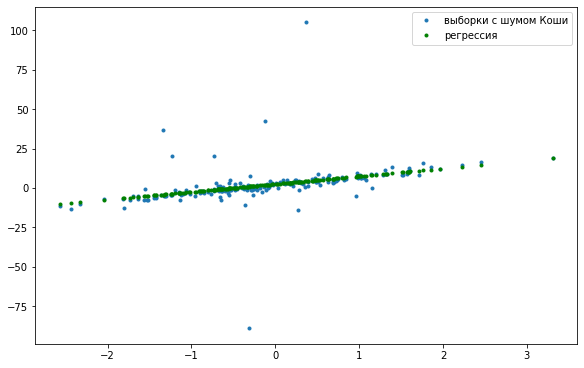

Оценка коэффициента корелляции (без группирования):
Доверительный интервал: [0.28646109153491767, 0.5182835349556371]
Точечная оценка: 0.4089488821819306

Оценка коэффициента корелляции (с группированием):
Доверительный интервал: [0.46441625266130643, 0.6539737366735279]
Точечная оценка: 0.5666462218600588


In [19]:
eta = sps.norm(0, 1).rvs(n)
ksi = 2 + 5 * eta

cauchy_noise = sps.cauchy(0, 1).rvs(n)
# ksi += 0.01 * cauchy_noise
ksi += cauchy_noise

plt.figure(figsize=(8,5), constrained_layout=True)
plt.plot(eta, ksi, '.')
plt.plot(eta, regression(eta, eta, ksi), '.', color='green')
plt.legend(['выборки с шумом Коши', 'регрессия'])
plt.show()

# plt.figure(figsize=(8,5), constrained_layout=True)
# plt.plot(eta, ksi - regression(eta, eta, ksi), '.')
# plt.axhline(0)
# plt.legend(['остатки'])
# plt.show()

print_cov_intervals(eta, ksi)

# Многомерная регрессия

In [20]:
p = n // 10

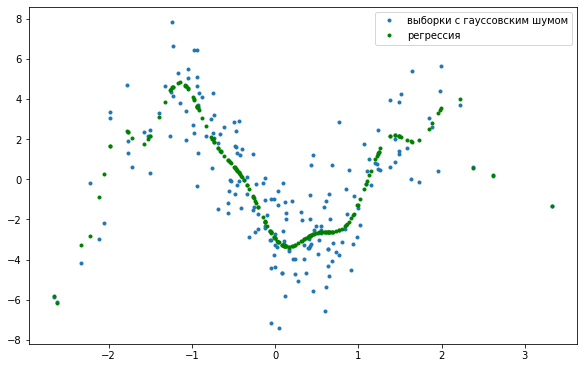

In [21]:
from sklearn import linear_model
eta = sps.norm(0, 1).rvs(n)
eta_pow = np.array([np.array([x_i ** i for i in range(p + 1)]) for x_i in eta])

gauss_noize_mean = 0
gauss_noise_var = 3
# gauss_noise = 0.01 * sps.norm(gauss_noize_mean, gauss_noise_var ** 0.5).rvs(n)
gauss_noise = sps.norm(gauss_noize_mean, gauss_noise_var ** 0.5).rvs(n)
ksi = 4 * np.sin(2 * eta + 4) + gauss_noise

clf = linear_model.LinearRegression()
clf.fit(eta_pow, ksi)

plt.figure(figsize=(8,5), constrained_layout=True)
plt.plot(eta, ksi, '.')
plt.plot(eta, eta_pow @ clf.coef_ + clf.intercept_, '.', color = 'green')
plt.legend(['выборки с гауссовским шумом', 'регрессия'])
plt.show()

# plt.figure(figsize=(8,5), constrained_layout=True)
# plt.plot(eta, ksi - eta_pow @ clf.coef_ - clf.intercept_, '.')
# plt.axhline(0)
# plt.legend(['остатки'])
# plt.show()